In [207]:
import warnings
warnings.filterwarnings('ignore')

# Setup

In [318]:
%matplotlib inline

In [209]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import duckdb

sns.set(style="whitegrid")

## Data Loading

In [210]:
con = duckdb.connect(database='ps6.duckdb', read_only=False)

### Load Views into Data Frames

#### All Listings
This view includes every row brought in from the detailed listings.csv from the Washington D.C. AirBnB data set. Some listings may be repeated if they are included in more than one quarter's listings data.

In [211]:
# Loading dataset
# connect to database

# read the result of an arbitrary SQL query to a Pandas DataFrame
all_listings = con.execute("SELECT * from all_listings").df()

In [212]:
all_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28076 entries, 0 to 28075
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            28076 non-null  int64         
 1   listing_url                                   28076 non-null  object        
 2   scrape_id                                     28076 non-null  int64         
 3   last_scraped                                  28076 non-null  datetime64[ns]
 4   name                                          28074 non-null  object        
 5   description                                   27666 non-null  object        
 6   neighborhood_overview                         18547 non-null  object        
 7   picture_url                                   28076 non-null  object        
 8   host_id                                       28076 non-null  int3

In [213]:
latest_listings = con.execute("SELECT * from latest_listings").df()

In [214]:
latest_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10560 entries, 0 to 10559
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            10560 non-null  int64         
 1   listing_url                                   10560 non-null  object        
 2   scrape_id                                     10560 non-null  int64         
 3   last_scraped                                  10560 non-null  datetime64[ns]
 4   name                                          10559 non-null  object        
 5   description                                   10416 non-null  object        
 6   neighborhood_overview                         6559 non-null   object        
 7   picture_url                                   10560 non-null  object        
 8   host_id                                       10560 non-null  int3

In [215]:
neighborhoods = con.execute("SELECT * from neighborhoods").df()

In [216]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  0 non-null      object
 1   neighbourhood        39 non-null     object
 2   type_outer           39 non-null     object
 3   feature_type         39 non-null     object
 4   geometry_type        39 non-null     object
 5   coordinates          39 non-null     object
dtypes: object(6)
memory usage: 2.0+ KB


In [217]:
reviews = con.execute("SELECT * from reviews").df()

In [218]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321209 entries, 0 to 321208
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     321209 non-null  int64         
 1   id             321209 non-null  int64         
 2   date           321209 non-null  datetime64[ns]
 3   reviewer_id    321209 non-null  int32         
 4   reviewer_name  321208 non-null  object        
 5   comments       321127 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(2)
memory usage: 13.5+ MB


In [219]:
calendar = con.execute("SELECT * from calendar").df()

In [220]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10245531 entries, 0 to 10245530
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 547.2+ MB


In [221]:
crimes = con.execute("SELECT * from crimes").df()

In [222]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   column00              27611 non-null  int32         
 1   NEIGHBORHOOD_CLUSTER  27609 non-null  object        
 2   offensegroup          27611 non-null  object        
 3   LONGITUDE             27611 non-null  float64       
 4   END_DATE              25411 non-null  object        
 5   offense-text          27611 non-null  object        
 6   SHIFT                 27611 non-null  object        
 7   offensekey            27611 non-null  object        
 8   START_DATE            27602 non-null  datetime64[ns]
 9   OFFENSE               27611 non-null  object        
 10  METHOD                27611 non-null  object        
 11  LATITUDE              27611 non-null  float64       
 12  NEIGHBORHOOD_NAME     27611 non-null  object        
dtypes: datetime64[ns

In [223]:
neighborhood_crimes = con.execute("SELECT * from neighborhood_crimes").df()

In [224]:
neighborhood_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NEIGHBORHOOD_NAME  46 non-null     object
 1   homicides          46 non-null     int64 
 2   robberies          46 non-null     int64 
 3   assaults           46 non-null     int64 
 4   theft_from_auto    46 non-null     int64 
 5   other_thefts       46 non-null     int64 
 6   vehicle_theft      46 non-null     int64 
 7   burglaries         46 non-null     int64 
 8   sex_abuses         46 non-null     int64 
 9   arsons             46 non-null     int64 
 10  violent_crimes     46 non-null     int64 
 11  property_crimes    46 non-null     int64 
 12  total_crimes       46 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 4.8+ KB


## Full Latest Listings View
The full_latest_listings view includes the latest listings data, with one row per listing, and aggregate crime data.

This is a convenient data set to use for modeling.

In [225]:
full_latest_listings = con.execute("SELECT * from full_latest_listings").df()

In [226]:
full_latest_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10560 entries, 0 to 10559
Data columns (total 87 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            10560 non-null  int64         
 1   listing_url                                   10560 non-null  object        
 2   scrape_id                                     10560 non-null  int64         
 3   last_scraped                                  10560 non-null  datetime64[ns]
 4   name                                          10559 non-null  object        
 5   description                                   10416 non-null  object        
 6   neighborhood_overview                         6559 non-null   object        
 7   picture_url                                   10560 non-null  object        
 8   host_id                                       10560 non-null  int3

For reference, we'll list the number of violent crimes per neighborhood.

In [227]:
full_latest_listings[['NEIGHBORHOOD_NAME','violent_crimes']].drop_duplicates().sort_values('NEIGHBORHOOD_NAME', ignore_index=True)

,NEIGHBORHOOD_NAME,violent_crimes
0,"Brightwood Park, Crestwood, Petworth",156
1,"Brookland, Brentwood, Langdon",124
2,"Capitol Hill, Lincoln Park",121
3,"Capitol View, Marshall Heights, Benning Heights",176
4,"Cathedral Heights, McLean Gardens, Glover Park",12
5,"Cleveland Park, Woodley Park, Massachusetts Av...",14
6,"Colonial Village, Shepherd Park, North Portal ...",13
7,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",226
8,"Congress Heights, Bellevue, Washington Highlands",369
9,"Deanwood, Burrville, Grant Park, Lincoln Heigh...",167


In [243]:
def correlations(data, y, xs):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(data[y], data[x])[0]
        rs.append(r)
        rho = stats.spearmanr(data[y], data[x])[0]
        rhos.append(rho)
    return pd.DataFrame({"feature": xs, "r": rs, "rho": rhos})

In [245]:
import models

In [316]:
def plot_residuals(result, df, variables):
    height = (len(variables) // 3) * 6 
    figure = plt.figure(figsize=(20,height))

    plots = len( variables)
    rows = (plots // 3) + 1

    residuals = np.array([r[0] for r in result["residuals"]])
    limits = max(np.abs(residuals.min()), residuals.max())
    
    n = result["n"]
    for i, variable in enumerate( variables):
        axes = figure.add_subplot(rows, 3, i + 1)

        keyed_values = sorted(zip(df[variable].values, residuals), key=lambda x: x[ 0])
        ordered_residuals = [x[ 1] for x in keyed_values]

        axes.plot(list(range(0, n)), ordered_residuals, '.', color="dimgray", alpha=0.75)
        axes.axhline(y=0.0, xmin=0, xmax=n, c="firebrick", alpha=0.5)
        axes.set_ylim((-limits, limits))
        axes.set_ylabel("residuals")
        axes.set_xlabel(variable)

    plt.show()
    plt.close()
    
    return residuals

## Begin Alternative Models:

In [322]:
df2["log_price"] = df2["price"].apply(np.log)

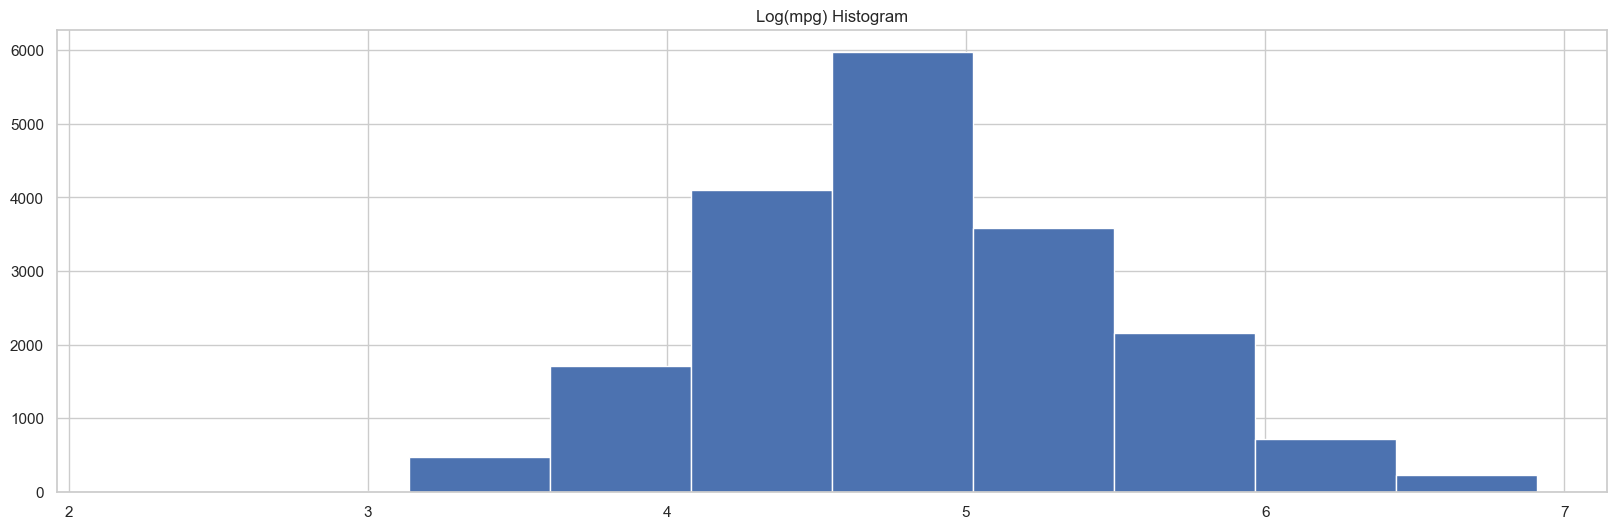

In [323]:
figure = plt.figure(figsize=(20,6))
axes = figure.add_subplot(1,1,1)
axes.hist(df2.log_price)
axes.set_title("Log(mpg) Histogram")
plt.show()
plt.close()

In [334]:
full_latest_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10560 entries, 0 to 10559
Data columns (total 87 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            10560 non-null  int64         
 1   listing_url                                   10560 non-null  object        
 2   scrape_id                                     10560 non-null  int64         
 3   last_scraped                                  10560 non-null  datetime64[ns]
 4   name                                          10559 non-null  object        
 5   description                                   10416 non-null  object        
 6   neighborhood_overview                         6559 non-null   object        
 7   picture_url                                   10560 non-null  object        
 8   host_id                                       10560 non-null  int3

In [367]:
df_6 = full_latest_listings[full_latest_listings[["host_listings_count",
                                               "latitude",
                                               "longitude", 
                                               "room_type",
                                               "accommodates",
                                               "bedrooms",
                                               "beds",
                                               "minimum_nights",
                                               "maximum_nights",
                                               "number_of_reviews_ltm",
                                               "number_of_reviews",
                                               "review_scores_rating",
                                               "review_scores_accuracy",
                                               "review_scores_cleanliness",
                                               "review_scores_checkin",
                                               "review_scores_communication",
                                               "review_scores_location",
                                               "review_scores_value",
                                               "reviews_per_month",
                                               "violent_crimes",
                                               "host_identity_verified"]].notnull().all(1)]
df_6 = df_6[["price",
                "host_listings_count",
                "latitude",
                "longitude",
                "room_type",
                "accommodates",
                "bedrooms",
                "beds",
                "minimum_nights",
                "maximum_nights",
                "number_of_reviews_ltm",
                "number_of_reviews",
                "review_scores_rating",
                "review_scores_accuracy",
                "review_scores_cleanliness",
                "review_scores_checkin",
                "review_scores_communication",
                "review_scores_location",
                "review_scores_value",
                "reviews_per_month",
                "violent_crimes",
                "host_identity_verified"]].copy()

In [368]:
df_6 = df_6[df_6.price <= 1000]

Removed 36 / 6751 = 0.5% of entries

In [369]:
# TODO: Encode categorical variables into one-hot-encodings
df_6 = pd.concat([df_6, pd.get_dummies(df_6["room_type"], prefix='room_type')], axis=1)
df_6 = pd.concat([df_6, pd.get_dummies(df_6["host_identity_verified"], prefix='host_identity_verified')], axis=1)
# df_6 = pd.concat([df_6, pd.get_dummies(df_6["neighbourhood_cleansed"], prefix="neighborhood")], axis=1)

In [370]:
df_6.columns = df_6.columns.str.replace(', ','_')
df_6.columns = df_6.columns.str.replace(' ','_')
df_6.columns = df_6.columns.str.replace('\._','_')
df_6.columns = df_6.columns.str.replace('/|-','')

In [374]:
df_6["log_price"] = df_6["price"].apply(np.log)

In [375]:
df_6 = df_6.select_dtypes(exclude=['object'])

In [376]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6715 entries, 0 to 10549
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         6715 non-null   float64
 1   host_listings_count           6715 non-null   float64
 2   latitude                      6715 non-null   float64
 3   longitude                     6715 non-null   float64
 4   accommodates                  6715 non-null   int32  
 5   bedrooms                      6715 non-null   float64
 6   beds                          6715 non-null   float64
 7   minimum_nights                6715 non-null   int32  
 8   maximum_nights                6715 non-null   int32  
 9   number_of_reviews_ltm         6715 non-null   int32  
 10  number_of_reviews             6715 non-null   int32  
 11  review_scores_rating          6715 non-null   float64
 12  review_scores_accuracy        6715 non-null   float64
 13  re

In [391]:
model_6_variables = ['host_listings_count',
                     'latitude',
                     'longitude',
                     'accommodates',
                     'bedrooms',
                     'beds',
                     'minimum_nights',
                     'maximum_nights',
                     'number_of_reviews_ltm',
                     'number_of_reviews',
                     'review_scores_rating',
                     'review_scores_accuracy',
                     'review_scores_cleanliness',
                     'review_scores_checkin',
                     'review_scores_communication',
                     'review_scores_location',
                     'review_scores_value',
                     'reviews_per_month',
                     'violent_crimes',
                     'room_type_Entire_homeapt',
                     'room_type_Hotel_room',
                     'room_type_Private_room',
#                      'room_type_Shared_room',
                     'host_identity_verified_False',
#                      'host_identity_verified_True',
                      ]

In [373]:
correlations(df_6, "log_price", df_6.columns.values.tolist())

,feature,r,rho
0,price,1.000000,1.000000
1,host_listings_count,0.056107,0.028360
2,latitude,-0.082851,-0.133721
3,longitude,-0.117552,-0.138889
4,accommodates,0.573274,0.622281
5,bedrooms,0.615569,0.599590
6,beds,0.478420,0.535848
7,minimum_nights,0.020790,0.014154
8,maximum_nights,0.018611,0.083456
9,number_of_reviews_ltm,0.020588,0.148961


In [392]:
model_string = "log_price ~ " + ' + '.join(model_6_variables)

In [381]:
result6 = models.bootstrap_linear_regression(model_string, data=df_6)
models.describe_bootstrap_lr(result6)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,-106.70,-127.15,-77.32
host_listings_count,$\beta_{1}$,0.00,0.00,0.00
latitude,$\beta_{2}$,-3.58,-3.96,-3.29
longitude,$\beta_{3}$,-3.23,-3.57,-2.88
accommodates,$\beta_{4}$,0.07,0.06,0.08
bedrooms,$\beta_{5}$,0.27,0.25,0.29
beds,$\beta_{6}$,-0.03,-0.05,-0.01
minimum_nights,$\beta_{7}$,0.00,-0.00,0.00
maximum_nights,$\beta_{8}$,0.00,-0.00,0.00


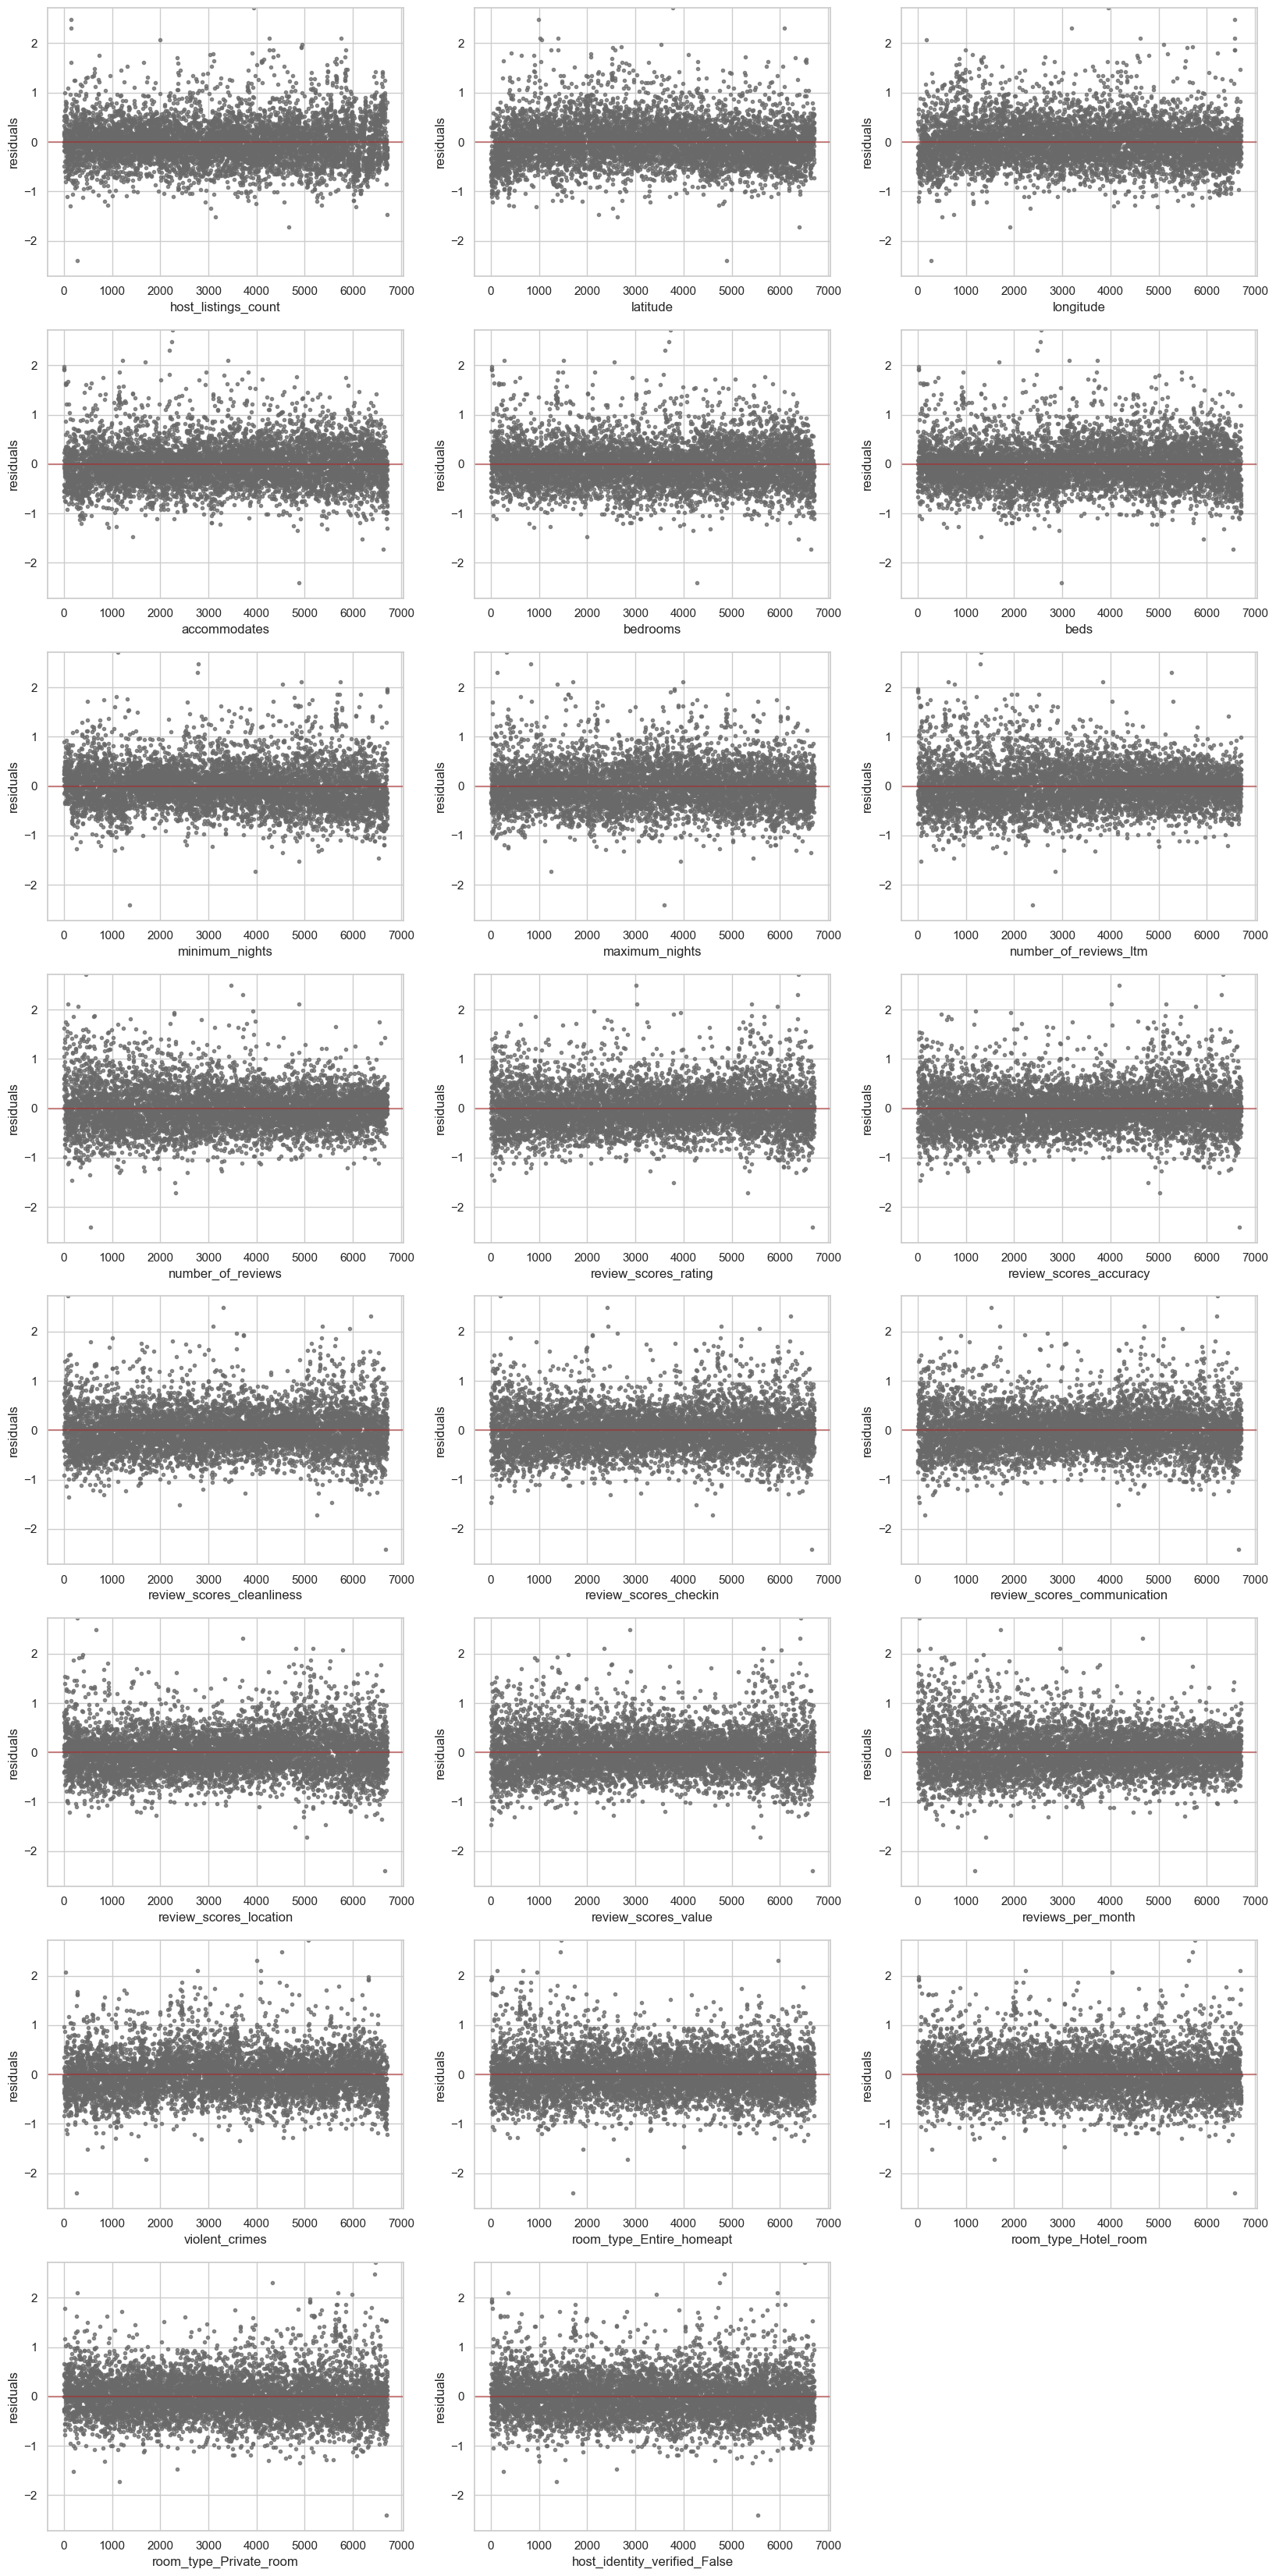

In [383]:
residuals6 = plot_residuals(result6, df_6, model_6_variables)

## Cross-Validation

First, we're going define some functions to calculate the cross validation. (Note: that you probably can use Scikit Learn's evaluation functions directly. When the course was first started, many of these functions didn't exist.)

This first function "chunks" `xs` into `n` chunks.

In [393]:
# Code from Lab 11 Solution
def chunk(xs, n):
    k, m = divmod(len(xs), n)
    return [xs[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n)]

This next function does the actual cross validation:

In [394]:
# Code from Lab 11 Solution
def cross_validation(algorithm, formula, data, evaluate, fold_count=10, repetitions=3):
    indices = list(range(len( data)))
    metrics = []
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[fold]
            train_indices = [idx not in fold for idx in indices]
            train_data = data.iloc[train_indices]
            result = algorithm(formula, data=train_data)
            model = result["model"]
            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
            # y = np.ravel( y) # might need for logistic regression
            results = models.summarize(formula, X, y, model)
            metric = evaluate(results)
            metrics.append(metric)
    return metrics

Let's run `cross_validation` on our model and data:

In [400]:
import random
import patsy

In [401]:
result = cross_validation(models.linear_regression, model_string, df_6, lambda r: (r["sigma"], r["r_squared"]))

It's a bit easy to get confused here if you're not sure what you really want. 

In the results above, we have the metric ($\sigma$ or $R^2$) and the 95% credible intervals for the *metric*. Now we have 30 estimates of each metric. That's sufficient to estimate credible bounds. We can just get the quantiles. That is, 3 rounds of 10 fold cross validation is already a kind of Bootstrap estimate of the metric:

In [402]:
print(r"95% CI for sigma:", stats.mstats.mquantiles([r[0] for r in result], [0.025, 0.975]))

95% CI for sigma: [0.40451656 0.47355705]


In [403]:
print(r"95% CI for R^2:", stats.mstats.mquantiles([r[1] for r in result], [0.025, 0.975]))

95% CI for R^2: [0.50153602 0.61845976]


The *difference* between the two intervals is that the first Bootstrap results are based on a model evaluated against the data it was tested with whereas the 10 fold cross validation simulates the application of the model against data that was not used to train it.

Thus, when we field this model into "production" (use it on new data), the 10 fold cross validation results simulate the range of results we should expect to see (as long as the target population is correct and there is no "concept drift".)

Another possible interpretation of the question is that we can calculate the *mean* $\sigma$ and $R^2$ and calculate the 95% credible intervals for the *mean* values. This also makes sense. If we want to predict the average performance, we might want to see the credible intervals for that *average* performance (yes, we are estimating the average performance of a model that estimates insurance charges).

Let's start by seeing what the mean values are:

In [404]:
sigmas = [r[0] for r in result]
r_squareds = [r[1] for r in result]

In [405]:
print("mean sigma: ", np.mean(sigmas))
print("mean R^2: ", np.mean(r_squareds))

mean sigma:  0.44250149428949576
mean R^2:  0.5607485656832635


In [406]:
def resample(data):
    n = len(data)
    return [data[ i] for i in [stats.randint.rvs(0, n - 1) for _ in range( 0, n)]]

In [407]:
bootstrap = {}
bootstrap["sigma"] = np.array([np.mean(s) for s in [resample(sigmas) for i in range( 0, 1000)]])
bootstrap["r_squared"] = np.array([np.mean(r) for r in [resample(r_squareds) for i in range( 0, 1000)]])

In [408]:
print(r"95% CI for *mean* sigma:", stats.mstats.mquantiles(bootstrap["sigma"], [0.025, 0.975]))

95% CI for *mean* sigma: [0.43604058 0.44777806]


In [409]:
print(r"95% CI for *mean* R^2:", stats.mstats.mquantiles(bootstrap["r_squared"], [0.025, 0.975]))

95% CI for *mean* R^2: [0.55124033 0.57097418]


We have fairly tight bounds on what we think the average $\sigma$ and $R^2$ are for our model.

**3. Using Learning Curves and $\sigma$ determine if more data will improve the estimation of the model.**

Here we want to plot ever increasing chunks of the test data to simulate getting more data. This should/may/could also reveal if we are in a high bias or high variance situation.

In [410]:
from collections import defaultdict

In [415]:
# Code from Lab 11 Solution
def data_collection():
    result = dict()
    result[ "train"] = defaultdict( list)
    result[ "test"] = defaultdict( list)
    return result

In [416]:
# Code from Lab 11 Solution 
def learning_curves(algorithm, formula, data, evaluate, fold_count=10, repetitions=3, increment=1):
    indices = list(range(len( data)))
    results = data_collection()
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[ fold]
            train_indices = [idx for idx in indices if idx not in fold]
            train_data = data.iloc[train_indices]
            for i in list(range(increment, 100, increment)) + [100]: # ensures 100% is always picked.
                # the indices are already shuffled so we only need to take ever increasing chunks
                train_chunk_size = int( np.ceil((i/100)*len( train_indices)))
                train_data_chunk = data.iloc[train_indices[0:train_chunk_size]]
                # we calculate the model
                result = algorithm(formula, data=train_data_chunk)
                model = result["model"]
                # we calculate the results for the training data subset
                y, X = patsy.dmatrices( formula, train_data_chunk, return_type="matrix")
                result = models.summarize(formula, X, y, model)
                metric = evaluate(result)
                results["train"][i].append( metric)
                
                # we calculate the results for the test data.
                y, X = patsy.dmatrices( formula, test_data, return_type="matrix")
                result = models.summarize(formula, X, y, model)
                metric = evaluate(result)
                results["test"][i].append( metric)
            #
        #
    # process results
    # Rely on the CLT...
    statistics = {}
    for k, v in results["train"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["train"] = statistics
    statistics = {}
    for k, v in results["test"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["test"] = statistics
    return results
#

In [414]:
result = learning_curves(models.linear_regression, model_string, df_6, lambda r: r["sigma"])

In [417]:
# Code from Lab 11 Solution
def results_to_curves( curve, results):
    all_statistics = results[ curve]
    keys = list( all_statistics.keys())
    keys.sort()
    mean = []
    upper = []
    lower = []
    for k in keys:
        m, s = all_statistics[ k]
        mean.append( m)
        upper.append( m + 2 * s)
        lower.append( m - 2 * s)
    return keys, lower, mean, upper

In [418]:
# Code from Lab 11 Solution
def plot_learning_curves( results, metric, zoom=False):
    figure = plt.figure(figsize=(10,6))

    axes = figure.add_subplot(1, 1, 1)

    xs, train_lower, train_mean, train_upper = results_to_curves( "train", results)
    _, test_lower, test_mean, test_upper = results_to_curves( "test", results)

    axes.plot( xs, train_mean, color="steelblue")
    axes.fill_between( xs, train_upper, train_lower, color="steelblue", alpha=0.25, label="train")
    axes.plot( xs, test_mean, color="firebrick")
    axes.fill_between( xs, test_upper, test_lower, color="firebrick", alpha=0.25, label="test")
    axes.legend()
    axes.set_xlabel( "training set (%)")
    axes.set_ylabel( metric)
    axes.set_title("Learning Curves")

    if zoom:
        y_lower = int( 0.9 * np.amin([train_lower[-1], test_lower[-1]]))
        y_upper = int( 1.1 * np.amax([train_upper[-1], test_upper[-1]]))
        axes.set_ylim((y_lower, y_upper))

    plt.show()
    plt.close()
#

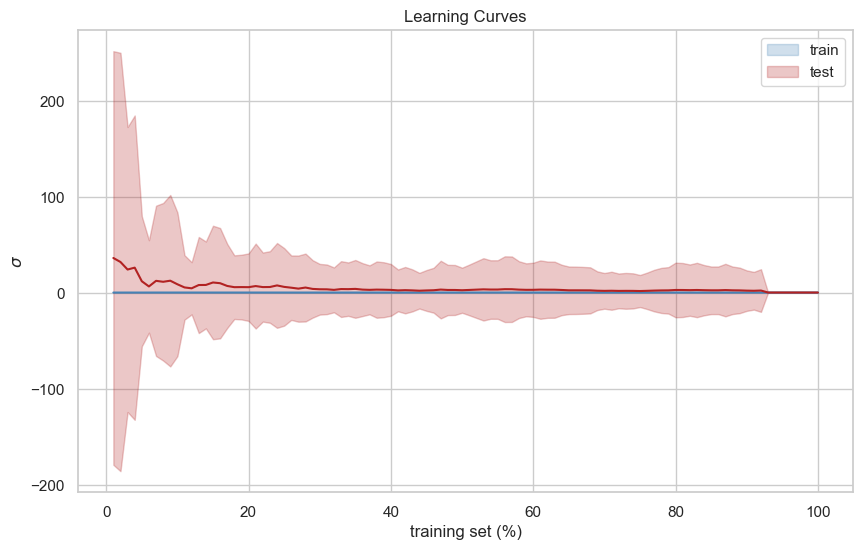

In [419]:
plot_learning_curves(result, r"$\sigma$")

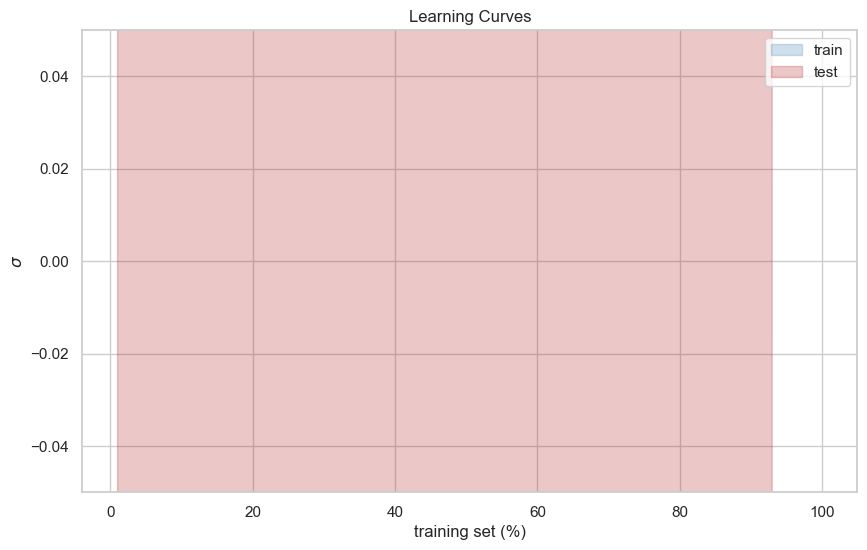

In [420]:
plot_learning_curves(result, r"$\sigma$", zoom=True)

This implementation is based off a submission by a student several semesters ago that I particularly liked. I had to modify it a bit to work with the current `models.py` file.

The description of Learning Curves are kind of under-specified. All most people say is that you need to plot the results for training data and test data. But they tend to be incredibly unstable if you just, say, use just one rotation of your 10 folds (fold 1 for test and folds 2-9 for training then stop).

Once you decide you want to do some averaging, the rest is pretty much up to you. Here we have plotted the  mean and 95.45% intervals.

In this case, it probably doesn't matter. If you look at just the curves (red and blue lines), they've pretty much well converged. Diagnosing "high bias" seems to be somewhat arbitrary. If we can live with the error ($\sigma$), we generally say this is a good model. If we can't ($\sigma$ is too high), then we say this is "high bias". In any case, getting more data won't make the model better.

Learning curves are a tool that gives you guidance...not magic.

# Predictions

In [206]:
con.close()